In [46]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.pipeline import make_pipeline

import random
np.random.seed(42) 
random.seed(42)

In [47]:
spotify = pd.read_csv('../raw_data/dataset.csv')

In [48]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [49]:
pd.set_option('display.max_columns', None)

In [50]:
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [51]:
spotify.duplicated().sum()

0

In [52]:
spotify.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [53]:
# feautures of interest in this project

selected_features = spotify[['danceability', 'energy', 'valence', 'tempo']]
selected_features

,danceability,energy,valence,tempo
0,0.676,0.4610,0.7150,87.917
1,0.420,0.1660,0.2670,77.489
2,0.438,0.3590,0.1200,76.332
3,0.266,0.0596,0.1430,181.740
4,0.618,0.4430,0.1670,119.949
...,...,...,...,...
113995,0.172,0.2350,0.0339,125.995
113996,0.174,0.1170,0.0350,85.239
113997,0.629,0.3290,0.7430,132.378
113998,0.587,0.5060,0.4130,135.960


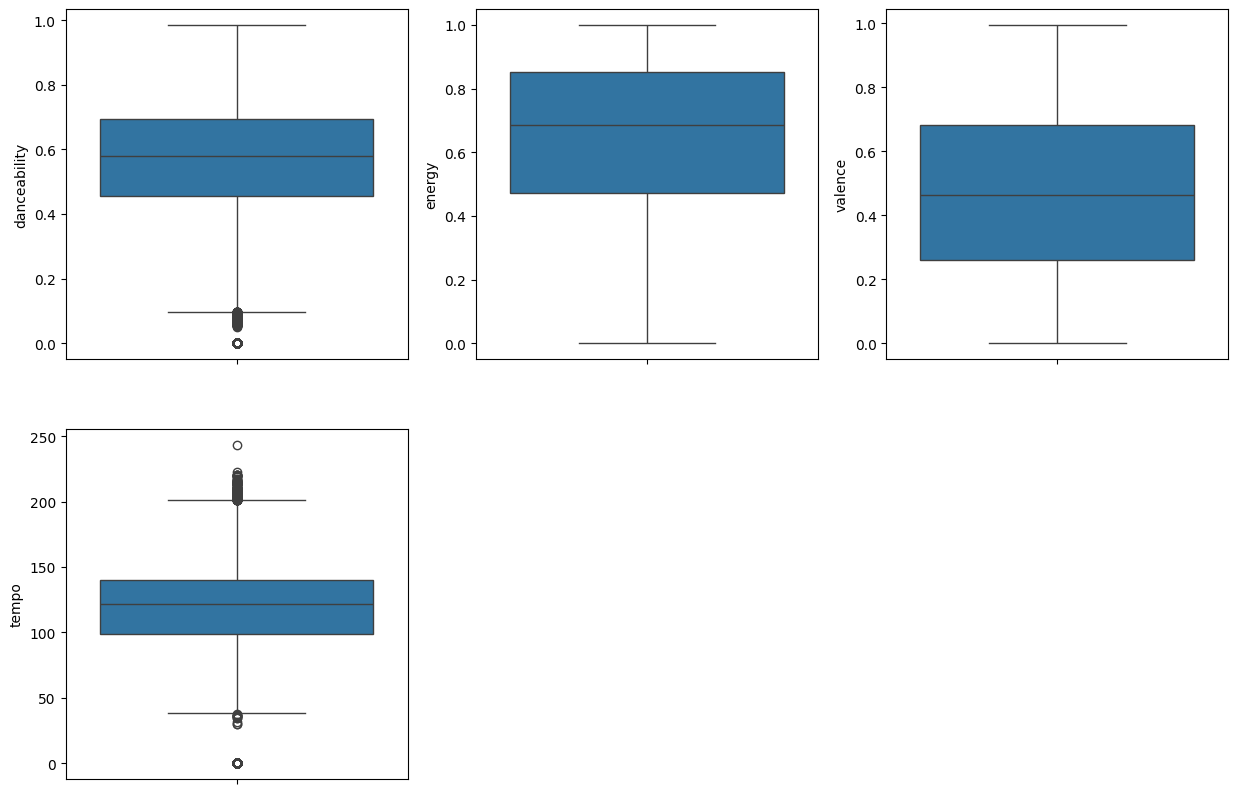

In [54]:
# checking the outliers

plt.figure(figsize=(15, 10))

for i, column in enumerate(selected_features.columns, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(data = spotify, y = column)

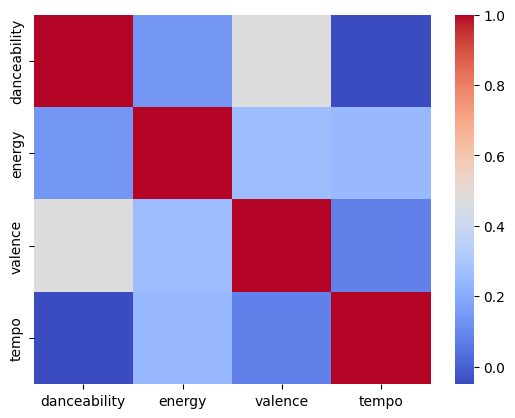

In [55]:
# the selected features are relatively correlated, so we need to apply PCA to reduce the multicolinearity before clustering

sns.heatmap(pd.DataFrame(selected_features).corr(), cmap = 'coolwarm');

In [56]:
# the best scaler for PCA is StandardScaler

scaler = StandardScaler()

scaler.fit(selected_features)
spotify_scaled_tr = scaler.transform(selected_features)

columns = selected_features.columns

spotify_scaled = pd.DataFrame(spotify_scaled_tr, columns = columns)
spotify_scaled

,danceability,energy,valence,tempo
0,0.629244,-0.717148,0.929306,-1.141863
1,-0.845908,-1.889980,-0.798690,-1.489717
2,-0.742186,-1.122669,-1.365688,-1.528312
3,-1.733304,-2.312994,-1.276974,1.987859
4,0.295030,-0.788711,-1.184403,-0.073348
...,...,...,...,...
113995,-2.274962,-1.615656,-1.697787,0.128333
113996,-2.263437,-2.084789,-1.693545,-1.231195
113997,0.358416,-1.241940,1.037306,0.341255
113998,0.116398,-0.538241,-0.235548,0.460742


In [57]:
pca = PCA()

spotify_scaled_pca = pca.fit_transform(spotify_scaled)

pd.DataFrame(spotify_scaled_pca)

,0,1,2,3
0,0.371205,-1.642659,-0.089917,0.483220
1,-2.199361,-1.449343,-0.184148,0.415994
2,-2.155291,-1.057982,0.467845,-0.169069
3,-2.452420,1.434585,-2.398051,0.336875
4,-0.979733,-0.310923,-0.432737,-0.934605
...,...,...,...,...
113995,-3.107439,0.690040,-0.552636,0.497003
113996,-3.612483,-0.545437,-0.060428,0.708691
113997,0.364009,-0.680443,-1.356906,0.653175
113998,-0.237264,0.091974,-0.675932,-0.222220


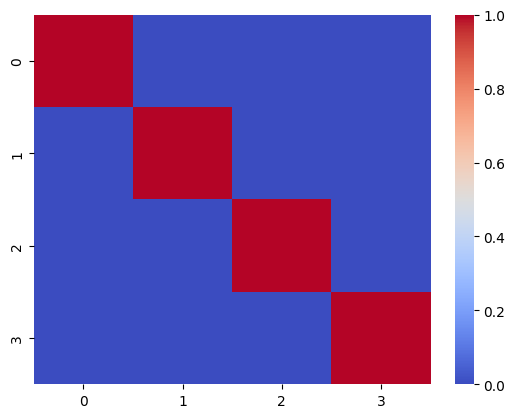

In [58]:
#  the PCA reduced multicolinearity to the absolute minimum and features are not correlated with eachother

sns.heatmap(pd.DataFrame(spotify_scaled_pca).corr(), cmap = 'coolwarm');

In [59]:
# PCA rank

pca.explained_variance_ratio_

array([0.40857273, 0.29039577, 0.17610341, 0.12492809])

In [60]:
# unsupervised learning by kmeans model

kmeans = KMeans(n_clusters = 3, n_init = 10, init='k-means++', max_iter=300)
kmeans.fit(spotify_scaled_pca)
kmeans

KMeans(n_clusters=3, n_init=10)

In [61]:
kmeans.cluster_centers_.shape


(3, 4)

In [62]:
labels = kmeans.labels_
labels

array([0, 1, 1, ..., 0, 2, 0], dtype=int32)

In [63]:
X = scaler.transform([[0.513, 0.73, 0.334, 171.001]])
X

/home/sara/.pyenv/versions/3.10.6/envs/song-sentiment-recommendation/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.31001284,  0.35231566, -0.54026178,  1.62963026]])

In [64]:
X_transform = pca.transform(X)
X_transform

/home/sara/.pyenv/versions/3.10.6/envs/song-sentiment-recommendation/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-0.00481823,  1.62103797, -0.60644912, -0.41502294]])

In [65]:
kmeans.predict(X_transform)

array([2], dtype=int32)

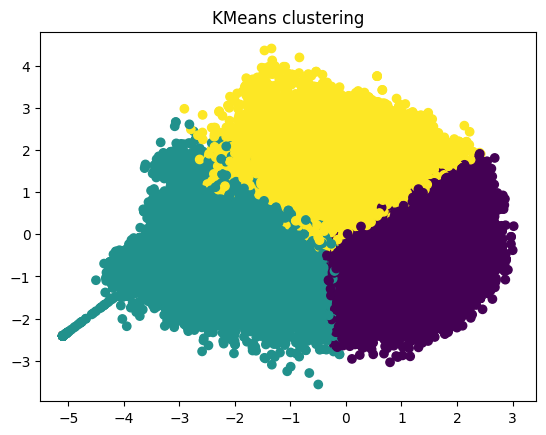

In [66]:
plt.scatter(pd.DataFrame(spotify_scaled_pca).iloc[:,0], pd.DataFrame(spotify_scaled_pca).iloc[:,1], c = labels)
plt.title('KMeans clustering');

In [67]:
pipeline_spotify = make_pipeline(
    StandardScaler(),
    PCA(n_components = 4),
    KMeans(n_clusters = 3, n_init = 10))

pipeline_spotify

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kmeans', KMeans(n_clusters=3, n_init=10))])

In [68]:
pipeline_spotify.fit(selected_features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kmeans', KMeans(n_clusters=3, n_init=10))])

In [69]:
pipeline_spotify.predict([[0.513, 0.73, 0.334, 171.001]])

/home/sara/.pyenv/versions/3.10.6/envs/song-sentiment-recommendation/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [70]:
# general characteristics of each cluster

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = spotify_scaled.columns)
cluster_centers

,danceability,energy,valence,tempo
0,0.980685,-0.496627,0.013411,0.070741
1,-1.549706,-0.584682,-0.288210,0.053634
2,-0.133710,1.173270,0.213732,-0.143188


In [71]:

# Adding the cluster labels to the original df

spotify['cluster'] = kmeans.labels_


spotify_selected = spotify[['danceability', 'energy', 'valence', 'tempo', 'cluster']]

cluster_summary = spotify_selected.groupby('cluster').mean()
cluster_summary


,danceability,energy,valence,tempo
cluster,,,,
0,0.692220,0.699349,0.675844,116.969490
1,0.463782,0.336143,0.266561,104.198512
2,0.472479,0.806675,0.356194,144.044189


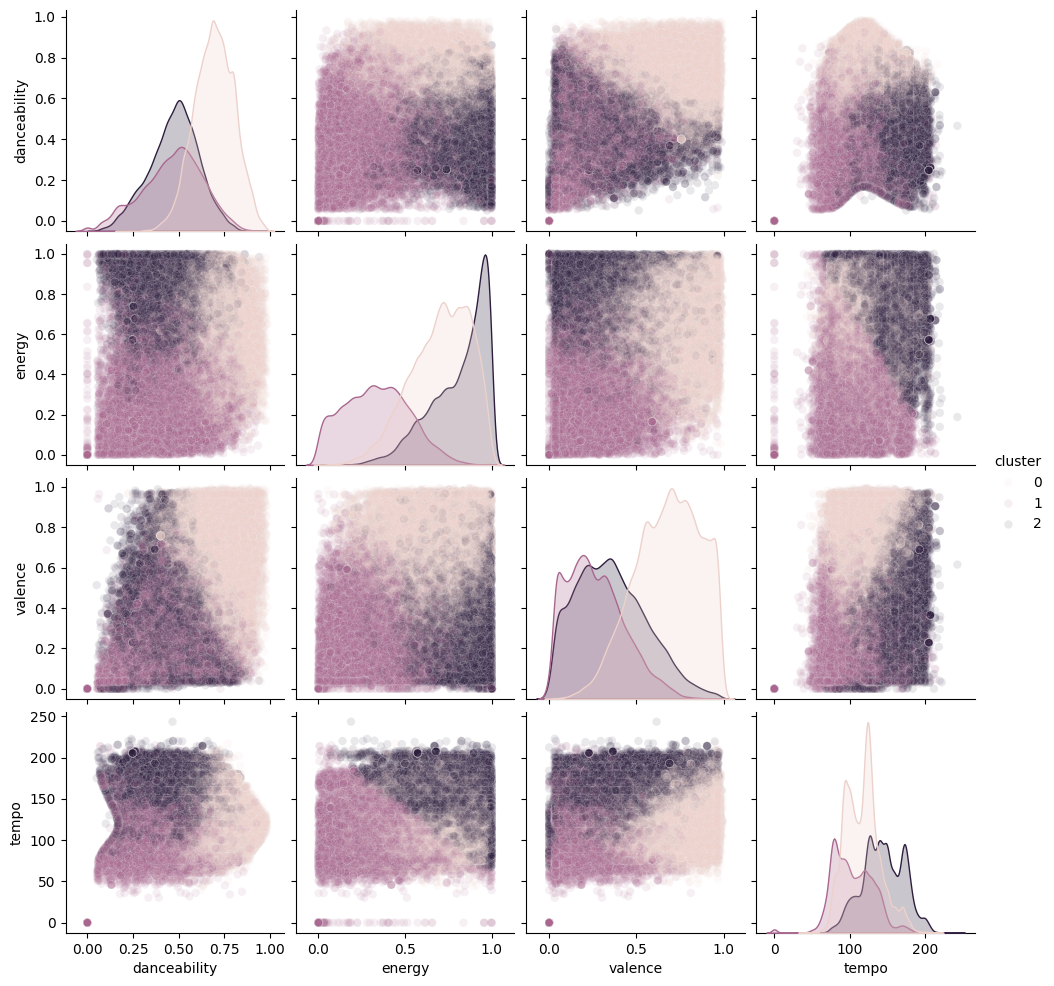

In [27]:
#sns.pairplot(spotify, hue = 'cluster', plot_kws = {'alpha':0.1}, vars = ['danceability', 'energy', 'valence' , 'tempo'])
#plt.show()

In [72]:
cluster_categories = {
    0: 'Happy',
    1: 'Sad',
    2: 'Neutral'
}



spotify['category'] = spotify['cluster'].map(cluster_categories)


print(spotify[['cluster', 'category', 'artists', 'track_name']])


        cluster category                 artists                  track_name
0             0    Happy             Gen Hoshino                      Comedy
1             1      Sad            Ben Woodward            Ghost - Acoustic
2             1      Sad  Ingrid Michaelson;ZAYN              To Begin Again
3             1      Sad            Kina Grannis  Can't Help Falling In Love
4             1      Sad        Chord Overstreet                     Hold On
...         ...      ...                     ...                         ...
113995        1      Sad           Rainy Lullaby         Sleep My Little Boy
113996        1      Sad           Rainy Lullaby            Water Into Light
113997        0    Happy           Cesária Evora              Miss Perfumado
113998        2  Neutral        Michael W. Smith                     Friends
113999        0    Happy           Cesária Evora                   Barbincor

[114000 rows x 4 columns]


In [73]:
import pickle

with open("pipeline_spotify.pkl", "wb") as file:
    pickle.dump(pipeline_spotify, file)

In [74]:
with open('pipeline_spotify.pkl', 'rb') as file:
    model = pickle.load(file)

In [75]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kmeans', KMeans(n_clusters=3, n_init=10))])

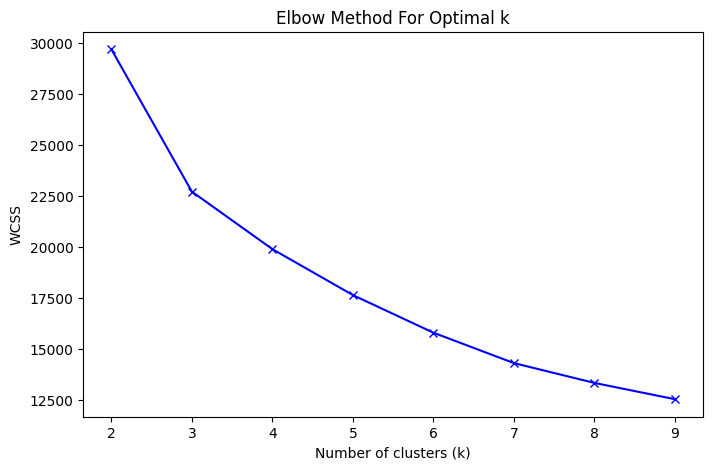

In [36]:
# testing the elbow method on a small portion of the dataset

spotify_scaled_pca_short = spotify_scaled_pca[:10000, :]

wcss_values = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', max_iter = 300)
    kmeans.fit(spotify_scaled_pca_short)
    wcss_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()


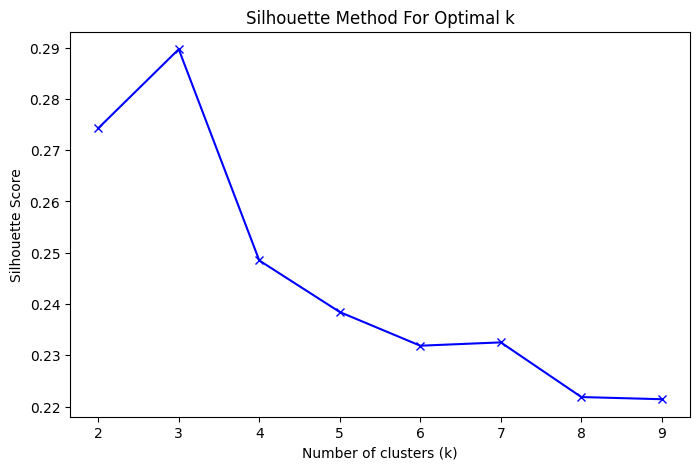

In [35]:
spotify_scaled_pca_short = spotify_scaled_pca[:10000, :]

silhouette_scores = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++')
    kmeans.fit(spotify_scaled_pca_short)
    labels = kmeans.labels_
    sil_score = silhouette_score(spotify_scaled_pca_short, labels)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()
